In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = pd.read_csv('searches.csv.bz2',sep='^',usecols=['Date','Destination','RoundTrip'], parse_dates=['Date'],nrows=1e5)

In [18]:
sFilter = s[s['Destination'].isin(['MAD','BCN','AGP'])]

In [30]:
sFilter['PlotDate'] = sFilter.Date.map(lambda d: "%d-%d" % (d.year,d.month))
sFilter['Searches'] = 1

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [34]:
g = sFilter.groupby(['PlotDate','Destination']).count().reset_index()[['PlotDate','Destination','Searches']]

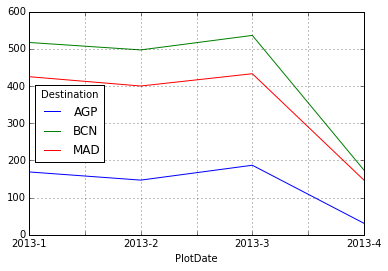

In [55]:
g.pivot('PlotDate','Destination','Searches').plot(grid=True)

In [45]:
g

TypeError: Empty 'DataFrame': no numeric data to plot

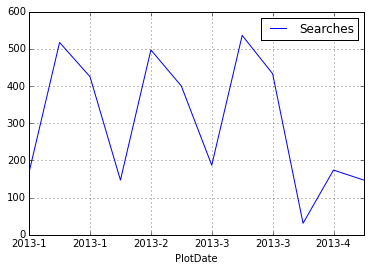

In [39]:
g.plot(x='PlotDate',y='Searches',grid=True)
